# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

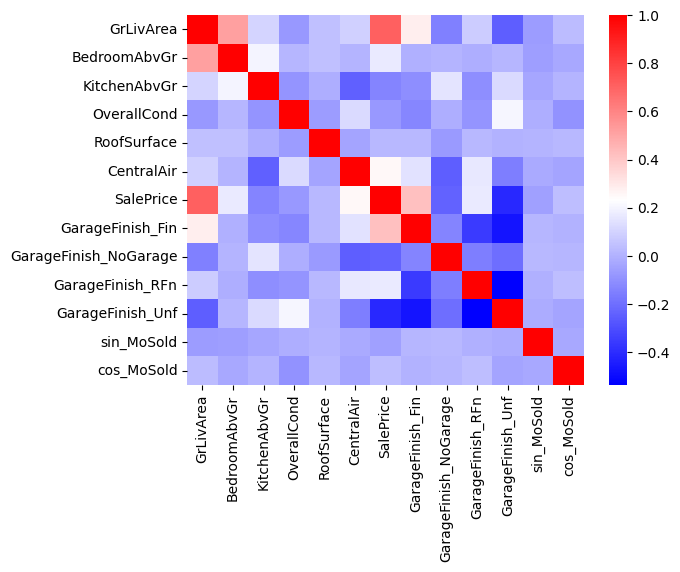

In [6]:
import seaborn as sns
# Heatmap of pairwise correlations
correlation_matrix = data.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

❓ Visualize the correlation between column pairs in a dataframe ❓

In [10]:
import numpy as np
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showe the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
6,GrLivArea,SalePrice,0.707685,0.707685
78,SalePrice,GrLivArea,0.707685,0.707685
139,GarageFinish_Unf,GarageFinish_RFn,-0.536355,0.536355
127,GarageFinish_RFn,GarageFinish_Unf,-0.536355,0.536355
1,GrLivArea,BedroomAbvGr,0.519712,0.519712
13,BedroomAbvGr,GrLivArea,0.519712,0.519712
137,GarageFinish_Unf,GarageFinish_Fin,-0.474129,0.474129
101,GarageFinish_Fin,GarageFinish_Unf,-0.474129,0.474129
97,GarageFinish_Fin,SalePrice,0.419678,0.419678
85,SalePrice,GarageFinish_Fin,0.419678,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [11]:
correlated_features = 0

🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [14]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'CentralAir', 'SalePrice', 'GarageFinish_Fin',
       'GarageFinish_NoGarage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'sin_MoSold', 'cos_MoSold'],
      dtype='object')

In [19]:
y = data['SalePrice']
X =data[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'CentralAir', 'GarageFinish_Fin',
       'GarageFinish_NoGarage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'sin_MoSold', 'cos_MoSold']]

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

base_model_score = np.mean(cross_val_score(model, X, y, cv=5))

print("Base Model Score (R²):", base_model_score)

Base Model Score (R²): 0.6404538820819161


🧪 **Test your code**

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [33]:
from sklearn.inspection import permutation_importance

# Fit model
lin_model = LinearRegression().fit(X, y)

# Perform the permutation
permutation_score = permutation_importance(lin_model, X, y, n_repeats=100)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending=False)

,feature,score decrease
0,GrLivArea,1.016575
1,BedroomAbvGr,0.064372
6,GarageFinish_Fin,0.052907
9,GarageFinish_Unf,0.021417
2,KitchenAbvGr,0.019862
5,CentralAir,0.015561
8,GarageFinish_RFn,0.011928
7,GarageFinish_NoGarage,0.011786
10,sin_MoSold,0.000933
3,OverallCond,0.000206


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [31]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [38]:
X = data.drop(columns = ['SalePrice', 'OverallCond',
       'RoofSurface', 
       'sin_MoSold', 'cos_MoSold'])

y = data['SalePrice']
model = LinearRegression()

simplified_model_score = np.mean(cross_val_score(model, X, y, cv=5))

print("Base Model Score (R²):", simplified_model_score)

Base Model Score (R²): 0.643356709312639


🧪 **Test your code**

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!